In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [6]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')  # Sometimes needed for lemmatization
nltk.download('punkt_tab')  # Explicitly downloading 'punkt_tab' as per the error message


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
# Load dataset
file_path = "/content/all_data.csv"
df = pd.read_csv(file_path)
df.head()

,book_title,Book_series,book_rating,book_author,genre,reviewer_name,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",emma,202.\nThat’s the number of times that the word...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,"3.75 stars\n""Rhys stepped off the stairs and t...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),4.51,Sarah J. Maas,"Fantasy, Romance, Young Adult, New Adult",Emily May,I wish so much that I could tell you I loved t...,5


# Text Preprocessing


In [8]:
def clean_text(text):
    text = str(text)  # Ensure the input is a string
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))  # Define stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords & non-alphabetic words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)  # Convert back to text


In [9]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [11]:
df['cleaned_review']

,cleaned_review
0,thats number time word mate hellish form used ...
1,need black silk robe balcony wear im gon na dr...
2,book totally wrecked best possible way im thri...
3,star rhys stepped stair took hand night triump...
4,wish much could tell loved book didnt thinking...
...,...
21554,one ask book bc literally remember nothing als...
21555,started harry potter audio book end august too...
21556,pity dead harry pity living live without love ...
21557,harry potter changed life hadnt read harry pot...


# Exploratory Data Analysis (EDA)


Rating Distribution Analysis:


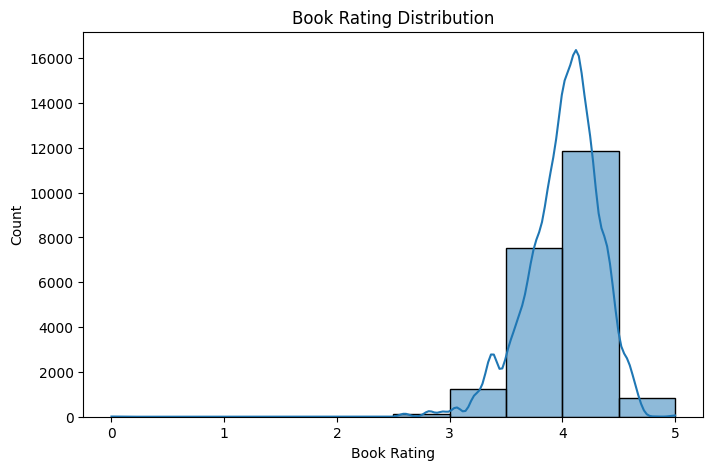

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['book_rating'], bins=10, kde=True)
plt.title('Book Rating Distribution')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

Text Length vs. Ratings:

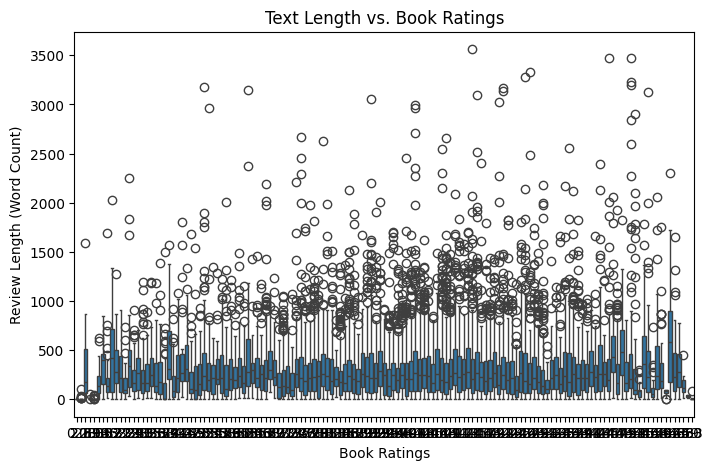

In [15]:
# Ensure the 'cleaned_review' column exists (if not already preprocessed)
df['cleaned_review'] = df['review'].astype(str)  # Convert to string if needed

# Calculate review length (word count)
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Boxplot of review length vs. book rating
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['book_rating'], y=df['review_length'])
plt.title('Text Length vs. Book Ratings')
plt.xlabel('Book Ratings')
plt.ylabel('Review Length (Word Count)')
plt.show()

Word Frequency Visualization:


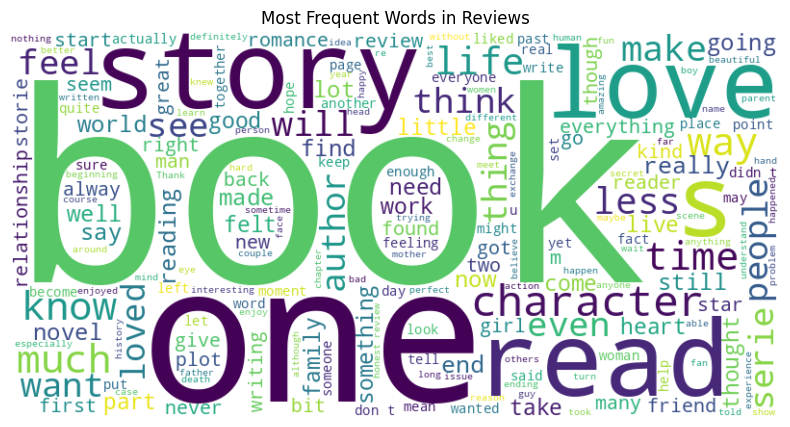

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()


Comparison Visualization:


In [19]:
comparison_df = df[['review', 'cleaned_review']].head(5)
print(comparison_df)


                                              review  \
0  202.\nThat’s the number of times that the word...   
1  I need a black silk robe and a balcony to wear...   
2  THIS BOOK TOTALLY WRECKED ME. In the best poss...   
3  3.75 stars\n"Rhys stepped off the stairs and t...   
4  I wish so much that I could tell you I loved t...   

                                      cleaned_review  
0  202.\nThat’s the number of times that the word...  
1  I need a black silk robe and a balcony to wear...  
2  THIS BOOK TOTALLY WRECKED ME. In the best poss...  
3  3.75 stars\n"Rhys stepped off the stairs and t...  
4  I wish so much that I could tell you I loved t...  


In [20]:
df['tokenized_review'] = df['cleaned_review'].apply(word_tokenize)
word2vec_model = Word2Vec(sentences=df['tokenized_review'], vector_size=100, window=5, min_count=2, workers=4)
word2vec_model.save("word2vec.model")


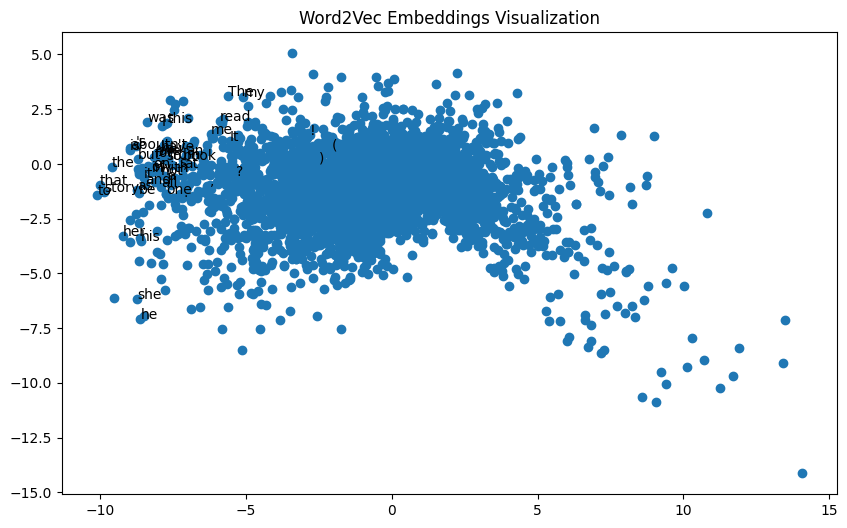

In [21]:
words = list(word2vec_model.wv.index_to_key)
word_vectors = word2vec_model.wv[words]

pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o')

for i, word in enumerate(words[:50]):  # Show only 50 words
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title("Word2Vec Embeddings Visualization")
plt.show()
